In [52]:
import warnings 
warnings.filterwarnings(action="ignore")

In [53]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("D:/DBDA_Official10/Machine_Learning/Machine_Learning/Assignment/Datasets/Claimants.csv")

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [56]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


<Axes: >

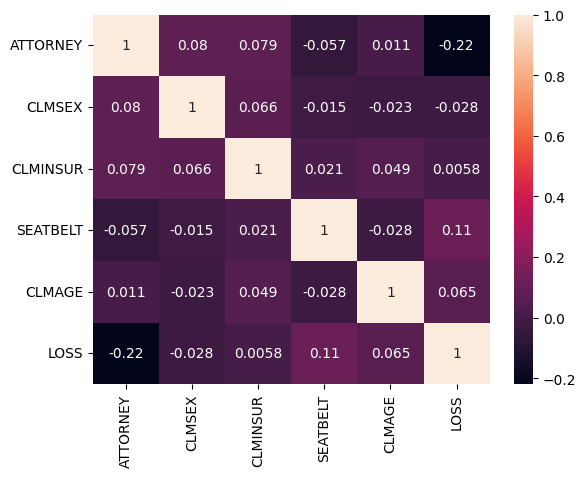

In [57]:
sns.heatmap(df.corr(), annot = True)

In [58]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


In [59]:
df.drop(['SEATBELT','CLMAGE'],axis = 1, inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   LOSS      1340 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 42.0 KB


In [61]:
x = df.drop(['ATTORNEY'], axis = 1)
y = df['ATTORNEY']

In [62]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.8 , random_state = 123456)

### Model Building

In [64]:
df['CLMSEX'] = df['CLMSEX'].fillna(df['CLMSEX'].mode()[0])
df['CLMINSUR'] = df['CLMINSUR'].fillna(df['CLMINSUR'].mode()[0])

In [63]:
def create_logistic():
    from sklearn.linear_model import LogisticRegressionCV

    model = LogisticRegressionCV()

    model.fit(x_train,y_train)

    return model

def create_naive():
    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()

    model.fit(x_train , y_train)

    return model

def create_KNN():
    from sklearn.neighbors import KNeighborsClassifier

    model = KNeighborsClassifier()

    model.fit(x_train,y_train)

    return model

def create_SVM():
    from sklearn.svm import SVC

    model = SVC()

    model.fit(x_train , y_train)

    return model

def create_Decision():
    from sklearn.tree import DecisionTreeClassifier

    model = DecisionTreeClassifier()

    model.fit(x_train , y_train)

    return model

In [71]:
x_train['CLMINSUR'].isna().sum()

np.int64(34)

In [69]:
x_train['CLMINSUR'].value_counts()

CLMINSUR
1.0    939
0.0     99
Name: count, dtype: int64

In [65]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
LOSS        0
dtype: int64

In [66]:
models = []

models.append({"name" : "Logistic_Regression" , "model" : create_logistic()})
models.append({"name" : "GaussianNB" , "model" : create_naive()})
models.append({"name" : "KNeighborsClassifier" , "model" : create_KNN()})
models.append({"name" : "SVC" , "model" : create_SVM()})
models.append({"name" : "DecisionTreeClassifier" , "model" : create_Decision()})

ValueError: Input X contains NaN.
LogisticRegressionCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values